In [245]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision import datasets
from torchvision import transforms
from PIL import Image, ImageFilter 
import PIL.ImageOps


In [229]:
class ANN(nn.Module):
    def __init__(self,input_size,output_size,hidden_size):
        super(ANN, self).__init__()
        self.dropout = nn.Dropout(p=0.2)
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,output_size)
    def forward(self, input):
        input = input.reshape(-1,self.input_size)
        output = self.fc1(input)
        output = self.dropout(output)
        output = self.relu(output)
        output = self.fc2(output)
        return output

In [230]:
input_size = 28*28
hidden_size = 25
output_size = 10
torch.manual_seed(3407)
ann = ANN(input_size, output_size,hidden_size)
optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()


In [231]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
ann.to(device)

cuda:0


ANN(
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=784, out_features=25, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=25, out_features=10, bias=True)
)

In [232]:
mnist_train = datasets.MNIST('./', download=True,transform = transforms.ToTensor())
mnist_test = datasets.MNIST('./', download=True, train=False,transform = transforms.ToTensor())


tensor([7, 2, 1,  ..., 4, 5, 6])


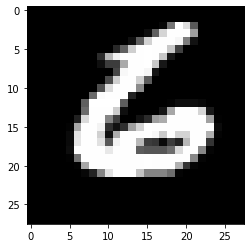

In [233]:
label =  mnist_test.targets
image = mnist_test.data[-1, :, :].numpy()
plt.imshow(image,cmap = "gray")
print(label)


In [234]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test, 
                                          batch_size=batch_size, 
                                          shuffle=False)

num_epochs: 0
num_epochs: 1
num_epochs: 2
num_epochs: 3
num_epochs: 4
num_epochs: 5
num_epochs: 6
num_epochs: 7
num_epochs: 8
num_epochs: 9
num_epochs: 10
num_epochs: 11
num_epochs: 12
num_epochs: 13
num_epochs: 14
num_epochs: 15
num_epochs: 16
num_epochs: 17
num_epochs: 18
num_epochs: 19
num_epochs: 20
num_epochs: 21
num_epochs: 22
num_epochs: 23
num_epochs: 24
num_epochs: 25
num_epochs: 26
num_epochs: 27
num_epochs: 28
num_epochs: 29
num_epochs: 30
num_epochs: 31
num_epochs: 32
num_epochs: 33
num_epochs: 34
num_epochs: 35
num_epochs: 36
num_epochs: 37
num_epochs: 38
num_epochs: 39
num_epochs: 40
num_epochs: 41
num_epochs: 42
num_epochs: 43
num_epochs: 44
num_epochs: 45
num_epochs: 46
num_epochs: 47
num_epochs: 48
num_epochs: 49
num_epochs: 50
num_epochs: 51
num_epochs: 52
num_epochs: 53
num_epochs: 54
num_epochs: 55
num_epochs: 56
num_epochs: 57
num_epochs: 58
num_epochs: 59
num_epochs: 60
num_epochs: 61
num_epochs: 62
num_epochs: 63
num_epochs: 64
num_epochs: 65
num_epochs: 66
num_e

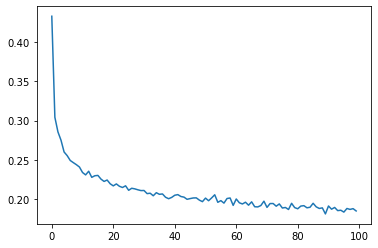

In [235]:
ann.train()
num_epochs = 100
losses = []
accuracy = []
for i in range(num_epochs):
    print(f"num_epochs: {i}")
    avg_losses = []
    for index , (img , label) in enumerate(train_loader):
        img , label = img.to(device) , label.to(device)
        optimizer.zero_grad()
        output = ann.forward(img)
        loss = criterion(output,label)
        avg_losses.append(loss.item())
        loss.backward()
        optimizer.step()
    losses.append(np.mean(avg_losses))
plt.plot(losses)

In [236]:
ann.eval()
accuracy = []
for index , (img , label) in enumerate(test_loader):
    img, label = img.to(device) , label.to(device)
    output = ann.forward(img)
    _ , max_indices = torch.max(output,1)
    test_acc = np.mean(np.round(label.detach().cpu().numpy()) == np.round(max_indices.detach().cpu().numpy()))
    accuracy.append(test_acc)
np.mean(accuracy)



0.9513449367088608

In [237]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 964    2    4    1    2    2    3    0    2    0]
 [   0 1117    6    4    0    1    1    1    5    0]
 [   4    4 1004    2    2    0    4    3    9    0]
 [   0    1   20  966    2   10    1    5    3    2]
 [   1    0   12    0  932    0    7    2    5   23]
 [   2    2    1   37    2  816    9    2   20    1]
 [   9    3    5    2    3   10  922    0    4    0]
 [   4    5   45    7    4    1    1  938    1   22]
 [   7    8   16    4    5   13    2    5  912    2]
 [   3    8    0   12   17   14    1    3   14  937]]


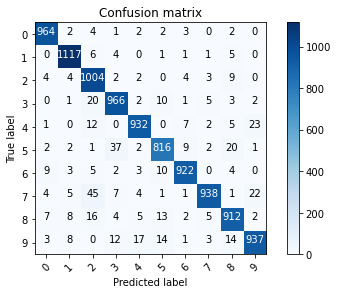

In [238]:
x_test = mnist_test.data.numpy()
y_test = mnist_test.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = ann(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

(28, 28)
(28, 28)
torch.Size([1, 784])
tensor([[-26.4300,   2.6920,  -6.5054,  -1.1264,   4.6489,  -3.0567, -18.9062,
           1.7183,  -4.0172,   6.2753]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([9], device='cuda:0')


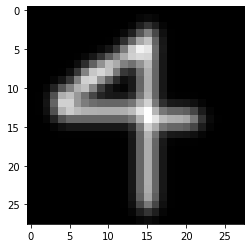

In [260]:
image = PIL.ImageOps.invert(Image.open(r"./7.png")).convert('L')
image = image.filter(ImageFilter.GaussianBlur(radius = 1))
print(image.size)
eigth = np.array(image)
plt.imshow(eigth,cmap = "gray")
print(eigth.shape)
eigth = eigth/255
eigth = torch.tensor(eigth,dtype=torch.float32)
eigth = eigth.reshape(1,-1)
print(eigth.size())
eigth = eigth.to(device)
pred = ann(eigth)
print(pred)
_, predictions = torch.max(pred, 1)
print(predictions)